In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork

plt.rcParams['text.usetex']=True
plt.style.use('classic')


param ={'SinT12'    : 0.308,
        'mu1'       : 0.,
        'mu2'       : 0.0, 
        'mu3'       : 0.  ,
        'mdm'       : 4.98 * 2e-4, 
        'alpha'     : 0.  , #0-pi
        'eps'       : 0.  , #0-1
        'alpha_eps' : 0.  , #0-pi
        'M12'       : 6.9e-5 }

Warning!: Python module pyslha not found, disabling slha reading routines


In [2]:
frame_total_event_rate  = FrameWork(threshold=4.5, efficiency_correction=False, resolution_correction=False)

""" expected event rate per day per 32.5 kilo ton assuming no oscillation 
(The value should be matched with 294.7 per day per 32.5 kilo ton) """

mc_expected_event = frame_total_event_rate.unoscillated_expected_event_rate
print(mc_expected_event)

[294.6329475]


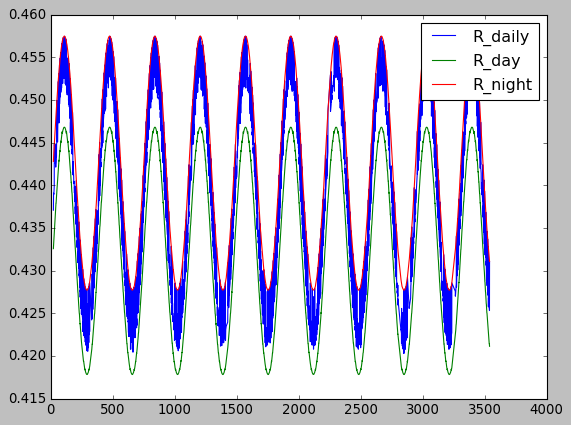

In [ ]:
""" predicted fraction of total signal in comparsion to expected unoscillation total signal / daily basis """

#'./Data/time_exposures.txt'
frame_total  = FrameWork(add='./Data/time_exposures.txt', threshold=3.5, efficiency_correction=True, resolution_correction=False)

predicted_total_signal = frame_total.__getitem__(param) 

daily_exposure, R_daily = frame_total._result_daily_basis(predicted_total_signal)

periods = frame_total.time_periods
num_periods = len(periods)
num_states = frame_total.weight.shape[0]
num_days = frame_total.time_day.shape[0]

periods_exposure = np.zeros((num_periods, num_days))
R_periods = np.zeros((num_periods, num_days, num_states))

for i in range (num_periods):
    periods_exposure[i] = frame_total.time_day[:,2+i]
    for j in range(num_states):
        R_periods[i,:,j] = predicted_total_signal[periods[i]][:,j]



for i in range(num_states):
    plt.plot(frame_total.time_day[:,1], R_daily[:,i])

for i in range (num_periods):
    plt.plot(frame_total.time_day[:,1], R_periods[i,:,0], )

plt.legend(['R_daily', 'R_day', 'R_night'])

In [4]:
R_day_daily = R_periods[0]
R_night_daily = R_periods[1]
day_exposure = periods_exposure[0]
night_exposure = periods_exposure[1]

time_bins = np.array([1])
prediction = [R_day_daily, R_daily, R_night_daily]
T_k = [day_exposure, daily_exposure, night_exposure]

bin_prediction = np.zeros((len(prediction), len(time_bins), num_states))
for i in range(len(time_bins)):
    cond = frame_total.time_day[:,0] == time_bins[i]
    for k in range (num_states):
        for j in range (len(prediction)):
            bin_prediction[j,i,k] = (1/np.sum(T_k[j][cond])) * np.sum(5.25 * T_k[j][cond] * prediction[j][cond,k])

        a_symmetry = 2 * (bin_prediction[0,i,k] - bin_prediction[2,i,k]) / (bin_prediction[0,i,k] + bin_prediction[2,i,k])
        print(f'R_day = {bin_prediction[0,i,k]:.3f}')
        print(f'R_mean = {bin_prediction[1,i,k]:.3f}')
        print(f'R_night = {bin_prediction[2,i,k]:.3f}')
        print(f'A_D/N = {a_symmetry:.3f}')

R_day = 2.278
R_mean = 2.307
R_night = 2.332
A_D/N = -0.023


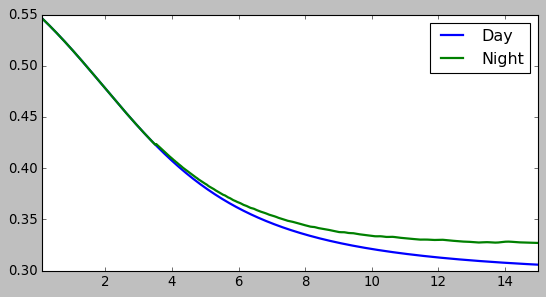

In [5]:
plt.figure(figsize=(8,4))
plt.ylim(0.3,0.55)
plt.xlim(1e-1,15)
#plt.xscale('log')


for period in periods:
    plt.plot(frame_total.energy_nu, np.mean(frame_total.pee[period],axis=0), lw =2)

plt.legend(['Day', 'Night'])

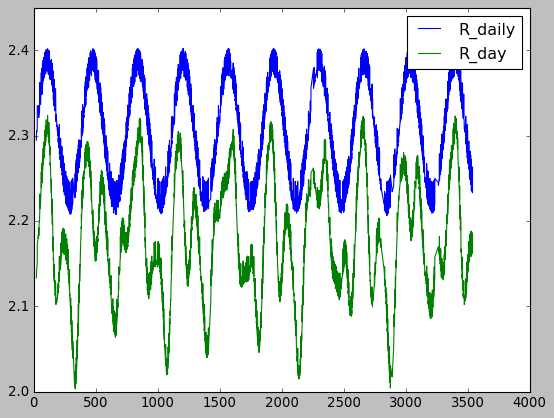

In [6]:
""" predicted fraction of total signal in comparsion to expected unoscillation total signal / daily basis """

#'./Data/time_exposures.txt'
frame_total  = FrameWork(add='./Data/time_exposures.txt', threshold=4.5, efficiency_correction=True, resolution_correction=False)

a_best = np.loadtxt('./Data/best_fit_8_91.txt')
param['SinT12'] = a_best[0]
param['M12'] = a_best[1] * 1e-5
param['mu2'] = a_best[2]
param['alpha'] = a_best[3]
param['eps'] = a_best[4]
param['alpha_eps'] = a_best[5]
param['mdm'] = 0.8*2e-4#a_best[7] * 2e-4

predicted_total_signal = frame_total.__getitem__(param) 

daily_exposure2, R_daily2 = frame_total._result_daily_basis(predicted_total_signal)

plt.plot(frame_total.time_day[:,1], 5.25 * R_daily[:,0])
plt.plot(frame_total.time_day[:,1], 5.25 * R_daily2[:,0])

plt.legend(['R_daily', 'R_day', 'R_night'])

In [7]:
data = np.loadtxt('./Data/modulation_data.txt')
time_bins = np.unique(frame_total.time_day[:,0])
mean_data = np.mean(data[:,1])

bin_prediction = np.zeros((len(time_bins)))
for i in range(len(time_bins)):
    cond = frame_total.time_day[:,0] == time_bins[i]
    bin_prediction[i] = (1/np.sum(daily_exposure[cond])) * np.sum(5.25 * daily_exposure[cond] * R_daily2[cond,0])

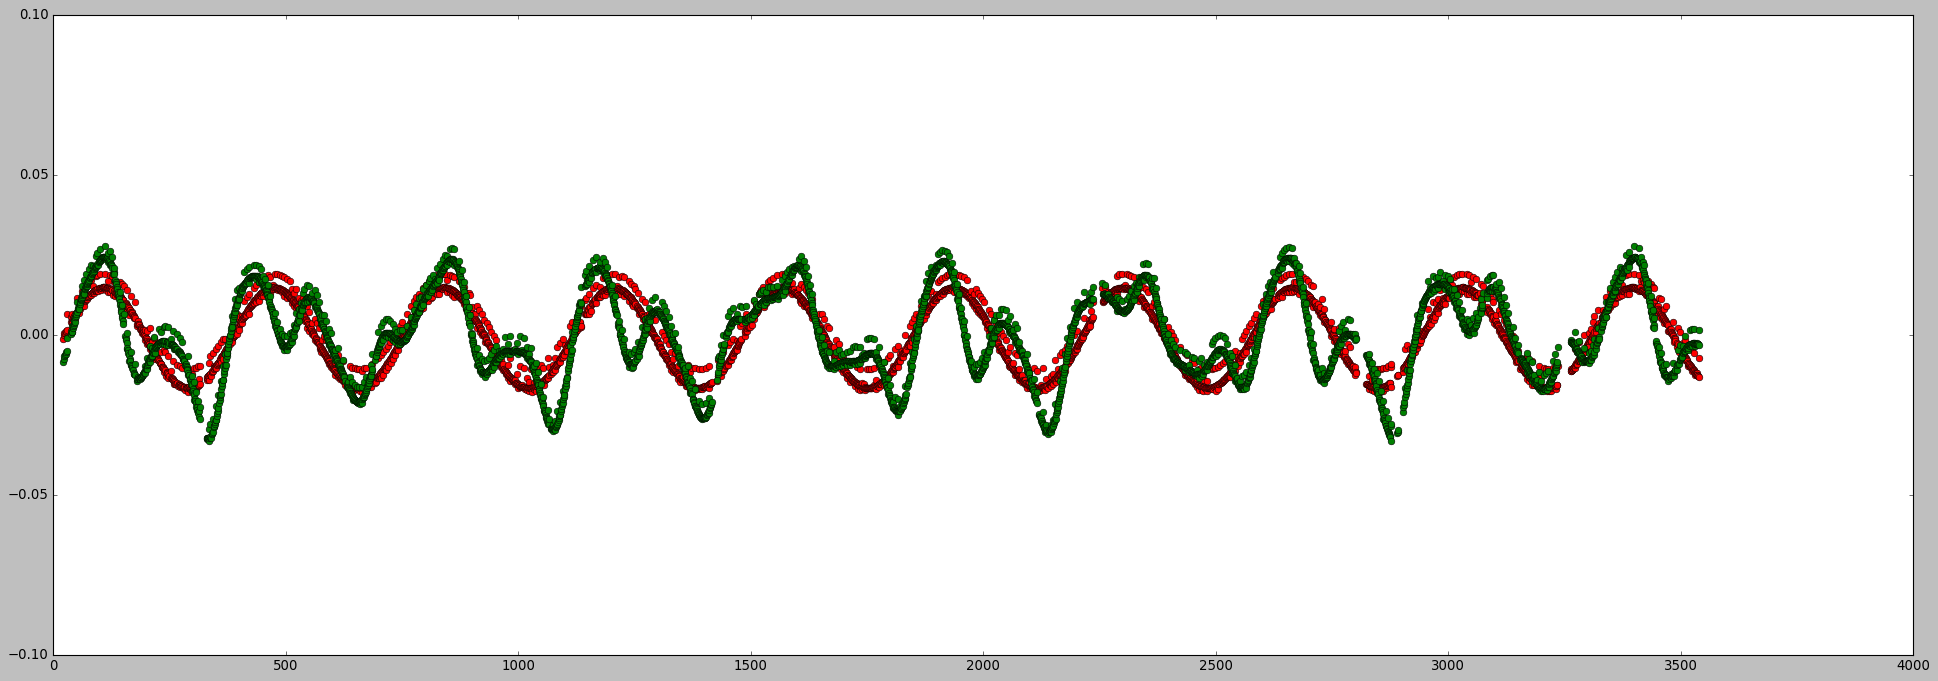

In [17]:
plt.figure(figsize=(30,10))
plt.ylim(-0.1,0.1)

plt.plot(frame_total.time_day[:,1], R_daily[:,0] - np.mean(R_daily[:,0]), 'ro')
plt.plot(frame_total.time_day[:,1], R_daily2[:,0] - np.mean(R_daily2[:,0]), 'go')
#plt.plot(data[:,0], bin_prediction2[:] - np.mean(bin_prediction2), 'bo')

#plt.errorbar(data[:,0], data[:,1] - mean_data, np.array((data[:,3],data[:,2])), fmt='k.')